# RegEx para extrair falas!

In [1]:
import re
import csv

call_me_by_your_name_txt = 'callmebyyourname_screenplay-2017.txt'

# Carregar o txt
with open(call_me_by_your_name_txt, 'r', encoding='utf-8') as file:
    screenplay_text = file.read()

# Definir o padrão de regex
pattern = re.compile(r'([A-Z]+(?: [A-Z]+)*)\n\s*(\(.*?\))?\s*(.*(?:\n\s+\(.*?\))?\s*.*)')

# Encontrar os padrões achados
matches = pattern.findall(screenplay_text)

# Cria o csv
csv_data = [['Character', 'Line']]
for match in matches:
    character, commentary, line = match
    full_line = f"{commentary} {line}".strip() if commentary else line.strip()
    csv_data.append([character, full_line])

# Salva o arquivo csv
csv_file_path = 'callmebyyourname_dialogues_extracted.csv'
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(csv_data)

print(f'CSV file created at: {csv_file_path}')

CSV file created at: callmebyyourname_dialogues_extracted.csv


## RegEx para Call me By Your Name! 
### (([A-Z]+(?: [A-Z]+)*)\n\s*(\(.*?\))?\s*(.*(?:\n\s+\(.*?\))?\s*.*))

+ 1. ([A-Z]+(?: [A-Z]+)*)
    + [A-Z]+: Correspondência a uma ou mais letras maiúsculas (por exemplo, "ELIO").
    + (?: [A-Z]+)*: Um grupo não capturador que corresponde a um espaço seguido por uma ou mais letras maiúsculas, zero ou mais vezes. Isso permite nomes de personagens compostos por várias palavras (por exemplo, "PROFESSOR PERLMAN").
    + ([A-Z]+(?: [A-Z]+)*): A expressão inteira é colocada entre parênteses para criar um grupo de captura para o nome do personagem.
    
+ 2. \n\s*
    + \n: Corresponde a um caractere de nova linha.
    + \s*: Corresponde a zero ou mais caracteres de espaço em branco. Isso permite qualquer quantidade de espaço ou indentação após a nova linha.
    
+ 3. (\(.*?\))?

    + \(: Corresponde a um parêntese de abertura.
    + .*?: Corresponde a qualquer caractere (exceto nova linha) zero ou mais vezes, de maneira não gananciosa (ou seja, para assim que puder).
    + \): Corresponde a um parêntese de fechamento.
    + (\(.*?\))?: A expressão inteira é colocada entre parênteses para criar um grupo de captura para comentários opcionais. O ? no final torna o grupo opcional.
    
+ (.*(?:\n\s+\(.*?\))?\s*.*)
    + .*: Corresponde a qualquer caractere (exceto nova linha) zero ou mais vezes. Isso começa a capturar a linha de diálogo real.
    + (?:\n\s+\(.*?\))?: Um grupo não capturador que opcionalmente corresponde a:
    + \n\s+: Uma nova linha seguida por um ou mais caracteres de espaço em branco (lida com casos onde comentários abrangem várias linhas).
    + \(.*?\): Comentários entre parênteses (não ganancioso).
    + \s*: Corresponde a zero ou mais caracteres de espaço em branco após o comentário opcional em várias linhas.
    + .*: Corresponde a quaisquer caracteres restantes na linha após o espaço em branco opcional.

In [2]:
import pandas as pd
with open('priscilla_script.txt', 'r') as file:
    screenplay_text = file.read()

#Usando regex para encontrar as falas dos personagens
# Considerando que o formato é "NomePersonagem.  Fala"
padrao = re.compile(r'(\b[A-Z][a-zA-Z]+\b)\.\s+(.*?)(?=\b[A-Z][a-zA-Z]+\b\.|\Z)', re.DOTALL)
falas = padrao.findall(screenplay_text)

#Criando um DataFrame com as falas
data = {'Character': [fala[0] for fala in falas], 'Line': [re.sub(r'\s+', ' ', fala[1].strip()) for fala in falas]}
pris_df = pd.DataFrame(data)

#Salvando o DataFrame em um arquivo CSV
pris_df.to_csv('priscilla_dialogues_extracted.csv', index=False)

## RegEx para Priscilla, A rainha do Deserto
### (\b[A-Z][a-zA-Z]+\b)\.\s+(.*?)(?=\b[A-Z][a-zA-Z]+\b\.|\Z)
+ (\b[A-Z][a-zA-Z]+\b)\.

    + \b: Um limite de palavra, que assegura que a correspondência ocorre no início de uma palavra. Evita que parte de uma palavra maior seja capturada.
    + [A-Z]: Um caractere maiúsculo de A a Z. Isso garante que a palavra começa com uma letra maiúscula.
    + [a-zA-Z]+: Uma ou mais letras maiúsculas ou minúsculas (de A a Z e de a a z). Isso captura o restante da palavra, que pode ser composta por várias letras.
    + \b: Outro limite de palavra, garantindo que a palavra completa é capturada.
    + \.: Um ponto literal. O caractere de escape \ é usado para tratar o ponto como um caractere normal, pois o ponto em regex tem um significado especial (qualquer caractere).
    
Explicação: Esta parte da regex captura um nome de personagem que começa com uma letra maiúscula e é seguido por um ponto (.). O nome do personagem é armazenado no primeiro grupo de captura (\b[A-Z][a-zA-Z]+\b).

+ \s+

    + \s+: Um ou mais espaços em branco (incluindo espaços, tabs, quebras de linha). Isso corresponde aos espaços após o ponto que segue o nome do personagem.
Explicação: Isso garante que há algum espaço em branco entre o ponto após o nome do personagem e o início da fala.

+ (.*?)

    + (.*?): Um grupo de captura não ganancioso (lazy).
    + .: Corresponde a qualquer caractere, exceto quebras de linha.
    + *: Corresponde a zero ou mais ocorrências do caractere anterior.
    + ?: Torna o quantificador * não ganancioso, o que significa que ele capturará o mínimo de caracteres possível.
Explicação: Esta parte captura a fala do personagem. O uso do quantificador não ganancioso *? garante que a correspondência se estenda apenas até o próximo padrão esperado, sem consumir demais.

+ (?=\b[A-Z][a-zA-Z]+\b\.|\Z)

    + (?= ... ): Lookahead positivo. Assegura que a correspondência seja seguida pelo padrão especificado sem incluí-lo na captura.
    + \b[A-Z][a-zA-Z]+\b\.: Padrão descrito anteriormente, que captura o nome de um personagem seguido por um ponto.
    + |: Operador OR. Permite uma correspondência alternativa.
    + \Z: Correspondência no final da string
    
Explicação: Esta lookahead verifica se, após a fala do personagem, há outro nome de personagem seguido por um ponto ou o final do texto. Isso garante que a fala seja capturada até o próximo nome de personagem ou o final do texto, sem incluir o próximo nome de personagem na captura.

# Importando Modelo do Google Newss

In [3]:
import gensim
import matplotlib.pyplot as plt
import os
import numpy as np
import spacy
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
notebook_dir = os.getcwd() # 
google_vectors = 'GoogleNews-vectors-negative300.bin.gz'
model_path = os.path.join(notebook_dir,google_vectors)

In [5]:
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

# Análise de Priscilla Rainha do Deserto

## Separando fala por personagem

In [6]:
bernadette_lines = pris_df[pris_df['Character'] == 'Bernadette']
tick_lines = pris_df[pris_df['Character'] == 'Tick']
adam_lines = pris_df[pris_df['Character'] == 'Adam']
mitzi_lines =pris_df[pris_df['Character'] == 'Mitzi']
felicia_lines = pris_df[pris_df['Character'] == 'Felicia']

### Função de Score

In [7]:
def get_score_from_df(df, target_word):
    """
    Calcula a similaridade média de cosseno entre um termo alvo e as palavras em cada linha de um DataFrame.

    Parâmetros:
    df (pandas.DataFrame): DataFrame contendo as linhas de texto para análise. 
                           Deve ter uma coluna chamada 'Line' com o texto de cada linha.
    target_word (string): Palavra que determina score. Deve estar no GoogleNews Vector.
    Retorna:
    tuple: Dois elementos:
           - Uma lista de valores de similaridade média de cosseno para cada linha.
           - Uma lista de índices das linhas do DataFrame que foram analisadas.
    """
    cos_sim_values = []
    line_idx_ner = []
    
    for idx, row in df.iterrows():
        line = row['Line']
        doc = nlp(line)
        line_idx_ner.append(idx)

        # Calcular similaridades de cosseno
        similarities = []
        target_vector = model[target_word]

        for token in doc:
            #verifica se o token não é o target e se existe no modelo
            if token.text.lower() != target_word and token.has_vector and token.text in model:
                word_vector = model[token.text]
                similarity = cosine_similarity([target_vector], [word_vector])[0][0]
                similarities.append(similarity)

        # Calcular similaridade média de cosseno
        if similarities:
            mean_similarity = np.mean(similarities)
        else:
            mean_similarity = 0

        cos_sim_values.append(mean_similarity)
    
    return cos_sim_values, line_idx_ner

In [8]:
#Carregando tokenizador
nlp = spacy.load('en_core_web_sm')

### Pegando os scores de cada personagem pra palavra target 'shame'

In [9]:
cos_sim_values_bern, line_idx_ner_bern = get_score_from_df(bernadette_lines, 'shame')
cos_sim_values_adam, line_idx_ner_adam = get_score_from_df(adam_lines, 'shame')
cos_sim_values_tick,  line_idx_ner_tick= get_score_from_df(tick_lines, 'shame')
cos_sim_values_mitz, line_idx_ner_mitz= get_score_from_df(mitzi_lines, 'shame')
cos_sim_values_feli, line_idx_ner_feli= get_score_from_df(felicia_lines, 'shame')

cos_sim_values_bern_p,  line_idx_ner_bern_p = get_score_from_df(bernadette_lines, 'pride')

### Plotando!

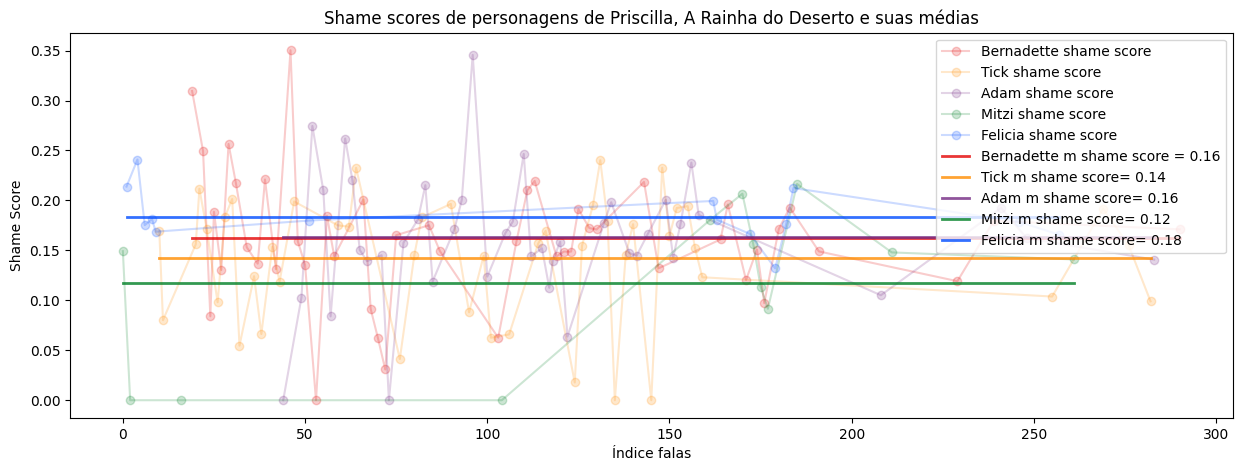

In [10]:
plt.figure(figsize=(15,5))

#Plotando os dados
plt.plot(line_idx_ner_bern,cos_sim_values_bern, marker='o', color='#E40303', label='Bernadette shame score', alpha=0.2)
plt.plot(line_idx_ner_tick,cos_sim_values_tick, marker='o', color='#FF8C00', label='Tick shame score', alpha=0.2)
plt.plot(line_idx_ner_adam,cos_sim_values_adam, marker='o', color='#732982', label='Adam shame score', alpha=0.2)
plt.plot(line_idx_ner_mitz,cos_sim_values_mitz, marker='o', color='#008026', label='Mitzi shame score', alpha=0.2)
plt.plot(line_idx_ner_feli,cos_sim_values_feli, marker='o', color='#004CFF', label='Felicia shame score', alpha=0.2)

#Médias
mean_bern = np.mean(cos_sim_values_bern)
mean_tick = np.mean(cos_sim_values_tick)
mean_adam = np.mean(cos_sim_values_adam)
mean_mitz = np.mean(cos_sim_values_mitz)
mean_feli = np.mean(cos_sim_values_feli)

# Plotando as médias
plt.plot(line_idx_ner_bern, [mean_bern]*len(line_idx_ner_bern), linewidth=2, color='#E40303', alpha=0.8, label=f'Bernadette m shame score = {round(mean_bern, 2)}')
plt.plot(line_idx_ner_tick, [mean_tick]*len(line_idx_ner_tick), linewidth=2, color='#FF8C00', alpha=0.8, label=f'Tick m shame score= {round(mean_tick, 2)}')
plt.plot(line_idx_ner_adam, [mean_adam]*len(line_idx_ner_adam), linewidth=2, color='#732982', alpha=0.8, label=f'Adam m shame score= {round(mean_adam, 2)}')
plt.plot(line_idx_ner_mitz, [mean_mitz]*len(line_idx_ner_mitz), linewidth=2, color='#008026', alpha=0.8, label=f'Mitzi m shame score= {round(mean_mitz, 2)}')
plt.plot(line_idx_ner_feli, [mean_feli]*len(line_idx_ner_feli), linewidth=2, color='#004CFF', alpha=0.8, label=f'Felicia m shame score= {mean_feli:.2f}')

plt.title('Shame scores de personagens de Priscilla, A Rainha do Deserto e suas médias')
plt.xlabel('Índice falas')
plt.ylabel('Shame Score')
# Adding a legend
plt.legend()
plt.savefig('shame_score_m_pris.png', dpi=300, format='png')

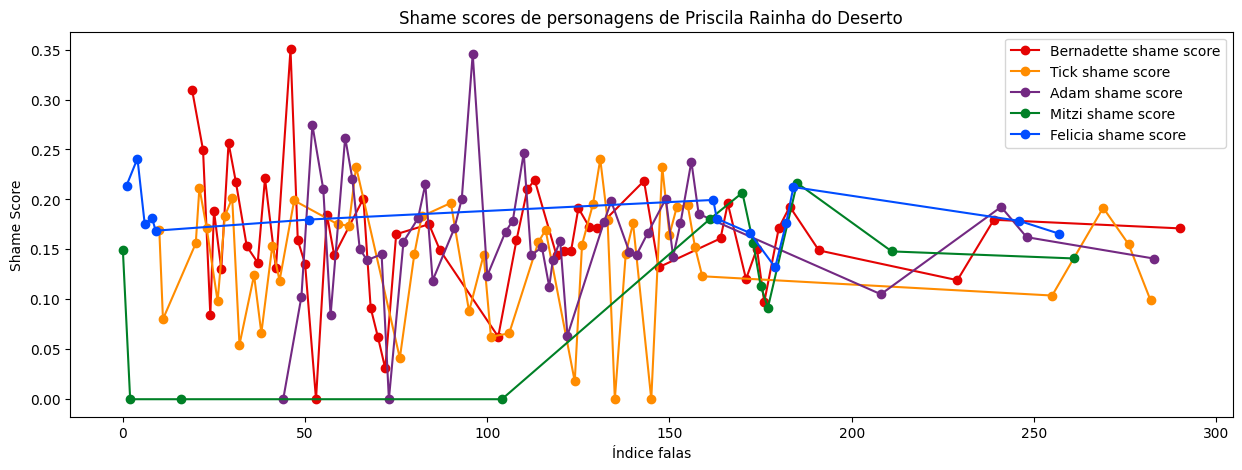

In [11]:
plt.figure(figsize=(15,5))
#Plotando os dados
plt.plot(line_idx_ner_bern,cos_sim_values_bern, marker='o', color='#E40303', label='Bernadette shame score')
plt.plot(line_idx_ner_tick,cos_sim_values_tick, marker='o', color='#FF8C00', label='Tick shame score')
plt.plot(line_idx_ner_adam,cos_sim_values_adam, marker='o', color='#732982', label='Adam shame score')
plt.plot(line_idx_ner_mitz,cos_sim_values_mitz, marker='o', color='#008026', label='Mitzi shame score')
plt.plot(line_idx_ner_feli,cos_sim_values_feli, marker='o', color='#004CFF', label='Felicia shame score')

plt.title('Shame scores de personagens de Priscila Rainha do Deserto')
plt.xlabel('Índice falas')
plt.ylabel('Shame Score')
plt.legend()

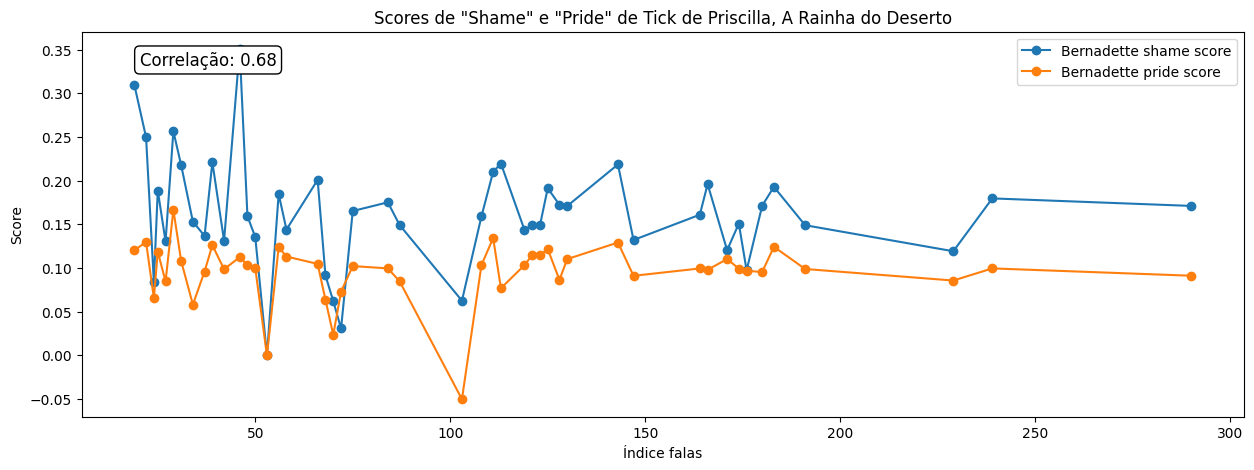

In [12]:
plt.figure(figsize=(15,5))
plt.plot(line_idx_ner_bern,cos_sim_values_bern, marker='o', label='Bernadette shame score')
plt.plot(line_idx_ner_bern_p,cos_sim_values_bern_p, marker='o', label='Bernadette pride score')

#Calcula correlação
correlation = np.corrcoef(cos_sim_values_bern, cos_sim_values_bern_p)[0,1]
plt.text(0.05, 0.95, f'Correlação: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.title('Scores de "Shame" e "Pride" de Tick de Priscilla, A Rainha do Deserto')
plt.xlabel('Índice falas')
plt.ylabel('Score')
plt.savefig('pride_shame_corr.png', dpi=300, format='png')
plt.legend()

# Análise de Call Me by Your Name

### Importando e Separando personagens

In [13]:
cmbyn_df = pd.read_csv('callmebyyourname_dialogues_extracted.csv')
cmbyn_df=cmbyn_df.dropna()

In [14]:
elio_df = cmbyn_df[cmbyn_df['Character']=='ELIO'] 
oliver_df = cmbyn_df[cmbyn_df['Character']=='OLIVER'] 

In [15]:
cos_sim_values_oliver, line_idx_ner_oliver = get_score_from_df(oliver_df, 'shame')
cos_sim_values_elio, line_idx_ner_elio = get_score_from_df(elio_df, 'shame')
cos_sim_values_elio_p, line_idx_ner_elio_p  = get_score_from_df(elio_df, 'pride')

### Plots

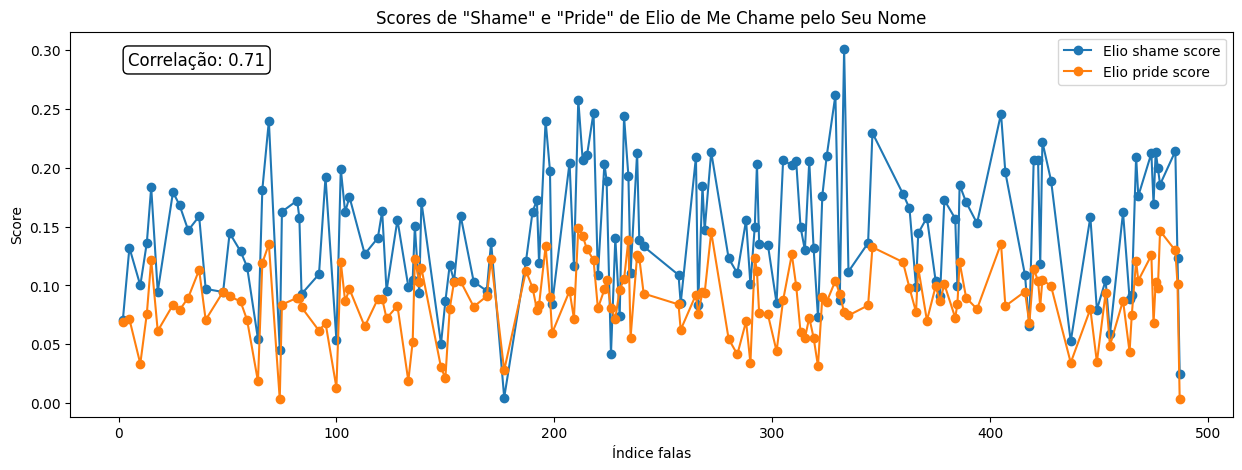

In [16]:
plt.figure(figsize=(15,5))
plt.plot(line_idx_ner_elio,cos_sim_values_elio, marker='o', label='Elio shame score')
plt.plot(line_idx_ner_elio_p,cos_sim_values_elio_p, marker='o', label='Elio pride score')

correlation = np.corrcoef(cos_sim_values_elio, cos_sim_values_elio_p)[0,1]
plt.text(0.05, 0.95, f'Correlação: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))


plt.legend()
plt.title('Scores de "Shame" e "Pride" de Elio de Me Chame pelo Seu Nome')
plt.xlabel('Índice falas')
plt.ylabel('Score')
plt.savefig('pride_shame_corr_cmbyn.png', dpi=300, format='png')

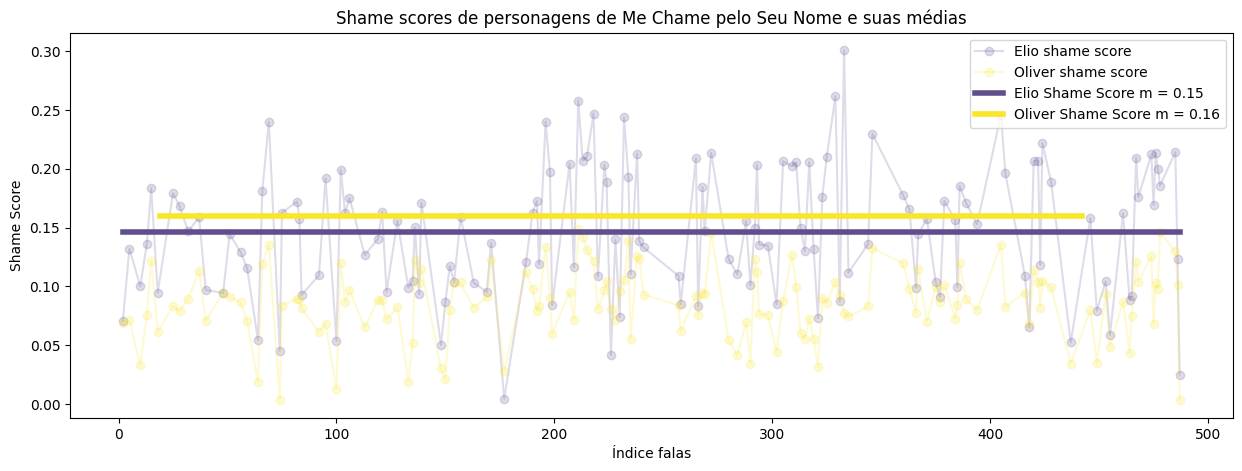

In [17]:
plt.figure(figsize=(15,5))
plt.plot(line_idx_ner_elio,cos_sim_values_elio, color='#604e8e', marker='o', label='Elio shame score', alpha=0.2)
plt.plot(line_idx_ner_elio_p,cos_sim_values_elio_p, color='#f9e626', marker='o', label='Oliver shame score', alpha=0.2)

mean_elio = np.mean(cos_sim_values_elio)
mean_oliver = np.mean(cos_sim_values_oliver)

plt.title('Shame scores de personagens de Me Chame pelo Seu Nome e suas médias')
plt.xlabel('Índice falas')
plt.ylabel('Shame Score')

plt.plot(line_idx_ner_elio, [mean_elio]*len(line_idx_ner_elio),color='#604e8e', linewidth=4, label=f'Elio Shame Score m = {mean_elio:.2f}') 
plt.plot(line_idx_ner_oliver, [mean_oliver]*len(line_idx_ner_oliver),color='#f9e626', linewidth=4, label=f'Oliver Shame Score m = {mean_oliver:.2f}')
plt.legend()
plt.savefig('shame_score_m_cmbyn.png', dpi=300, format='png')